In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(X):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-X))

def relu(X):
    """ReLU activation function"""
    return np.maximum(0, X)

In [ ]:
class Layer:
    input_shape = None
    output_shape = None
    
    def forward():
        pass

In [ ]:
import numpy as np

class Conv2D(Layer):
    @staticmethod
    def __calculate_output_shape(input_data_shape, kernel_length, padding, strides, n_kernel):
        """
        Calculate output shape of convolution operation
        
        Parameters
        ----------
        input_data_shape : tuple[int, int]
            Shape of input data
        kernel_length : int
            Length of kernel
        padding : int
            Padding to be used for convolution
        strides : int
            Strides to be used for convolution
        """
        return (n_kernel, ((input_data_shape[0] - kernel_length + 2 * padding) // strides[0]) + 1, ((
            input_data_shape[1] - kernel_length + 2 * padding) // strides[1]) + 1)


    def __conv(input_data: np.array, kernel: np.array, padding: int, strides: int, output_shape: tuple[int, int]) -> np.array:
        """Convolution operation on input_data using kernel with padding and strides

            Parameters
            ----------
            input_data : np.array
                Input data to be convolved
            kernel : np.array
                Kernel to be used for convolution
            padding : int
                Padding to be used for convolution
            strides : int
                Strides to be used for convolution
        """

        # Check if input_data is a 2D matrix
        assert kernel.shape[0] == kernel.shape[1], "Kernel must be a square matrix"
        kernel_length = kernel.shape[0]

        # Pad input_data with zeros
        padded_input = np.pad(input_data, padding,
                            mode="constant", constant_values=0)
            
        output = np.zeros(output_shape)

        # Convolve input_data with kernel
        ii = 0
        for i in range(output_shape[0]):
            jj = 0
            for j in range(output_shape[1]):
                output[i, j] = np.sum(
                    padded_input[ii:ii+kernel_length, jj:jj+kernel_length] * kernel)
                jj += strides[0]
            ii += strides[1]
        return output
    
    @staticmethod
    def __activate(X: np.ndarray, activation: Literal["sigmoid", "relu"] = "relu") -> np.ndarray:
        """Activation function to be used on X

            Parameters
            ----------
            X : np.ndarray
                Input data
            activation : str
                Activation function to be used
        """
        if activation == "sigmoid":
            f = lambda x: sigmoid(x)
        elif activation == "relu":
            f = lambda x: relu(x)
        else:
            raise ValueError("Activation function not supported")
        return f(X)


    def __init__(self, input_shape: tuple[int, int, int], padding: int, n_filters: int, filter_size: int, strides: tuple[int, int] = (1, 1)) -> None:
        """Conv2D layer

            Parameters
            ----------
            input_shape : tuple[int, int, int]
                Shape of input data
            padding : int
                Padding to be used for convolution
            n_filters : int
                Number of filters to be used
            filter_size : int
                Size of filters
            strides : tuple[int, int]
                Strides to be used for convolution
        """
        self.n_filters = n_filters
        self.filter_size = filter_size
        
        if (type(strides) == int):
            self.strides = (strides, strides)
        else:
            self.strides = strides  # (stride_height, stride_width)

        self.padding = padding
        self.input_shape = input_shape # (channels, height, width)
        self.output_shape = Conv2D.__calculate_output_shape(
            input_shape[1:], filter_size, padding, strides, n_filters)    # (channels, height, width)
        
        # Initialize weights and biases
        self.bias = np.random.randn()
        self.kernels = [np.random.randn(filter_size, filter_size) for _ in range(n_filters)]

    def forward(self, input_data: np.ndarray) -> np.ndarray:
        """Forward pass of Conv2D layer

            Parameters
            ----------
            input_data : np.ndarray
                Input data to be convolved
        """
        assert input_data.shape == self.input_shape, "Input data shape must be equal to input shape"
        output = []
        self.input_data = 
        for k in range(self.n_filters):
            res = np.zeros(self.output_shape[1:])
            for datum in input_data:
                res += Conv2D.__conv(datum, self.kernels[k], self.padding, self.strides, self.output_shape[1:])
            output.append(res)
        return Conv2D.__activate(np.array(output) + self.bias, "relu")


SyntaxError: invalid syntax (1624935167.py, line 124)

In [ ]:

from typing import Literal
class Pooling2D(Layer):
    def __init__(self, pool_size: tuple[int, int], strides: tuple[int, int] = None, pool_type: Literal["max", "average"] = "max") -> None:
        """Pooling2D layer

            Parameters
            ----------
            pool_size : tuple[int, int]
                Size of pooling window
            strides : tuple[int, int]
                Strides to be used for pooling
            pool_type: Literal["max", "average"]
                Type of pooling to be used
        """

        if strides is None:
            strides = pool_size

        self.pool_size = pool_size
        self.strides = strides
        self.pool_type = pool_type

    def __pool(self, input_data: np.ndarray) -> np.ndarray:
        """Pooling operation on input_data

            Parameters
            ----------
            input_data : np.ndarray
                Input data to be pooled
        """
        # Check if input_data is a 2D matrix
        assert len(input_data.shape) == 2, "Input data must be a 2D matrix"

        output = []

        # Pool input_data
        ii = 0

        output_shape = (((input_data.shape[0] - self.pool_size[0]) // self.strides[0]) + 1, (
            (input_data.shape[1] - self.pool_size[1]) // self.strides[1]) + 1)

        for _ in range(output_shape[0]):
            jj = 0
            output_row = []
            for _ in range(output_shape[1]):
                if self.pool_type == "max":
                    output_row.append(np.max(
                        input_data[ii:ii+self.pool_size[0], jj:jj+self.pool_size[1]]))
                elif self.pool_type == "average":
                    output_row.append(np.mean(
                        input_data[ii:ii+self.pool_size[0], jj:jj+self.pool_size[1]]))
                jj += self.strides[0]
            output.append(output_row)
            ii += self.strides[1]
        print("Wibu Rojan", np.array(output).shape)
        return np.array(output)

    def forward(self, input_data: np.ndarray) -> np.ndarray:
        """Forward pass of Pooling2D layer

            Parameters
            ----------
            input_data : np.ndarray
                Input data to be pooled
        """
        if len(input_data.shape) == 2:
            input_data = input_data.reshape(1, *input_data.shape)

        assert len(input_data.shape) == 3, "Input data must be a 3D matrix"

        output = []

        for datum in input_data:
            output.append(self.__pool(datum))
        return np.array(output)


if __name__ == "__main__":
    a = np.array([[[1, 2, 3, 4, 5], [
          6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [16, 17, 18, 19, 20], [16, 17, 18, 19, 20]]])
    print(a.shape)
    print(Pooling2D((2,2), (2, 2), "average").forward(a).shape)

(1, 6, 5)
Wibu Rojan (3, 2)
(1, 3, 2)


In [ ]:
class Dense(Layer):
    def __init__(self, input_size: int, units: int, activation: Literal["sigmoid", "relu"] = "relu") -> None:
        """
        Dense layer

        Parameters
        ----------
        input_size : int
            Size of input data
        units : int
            Number of neuron
        activation : str
            Activation function ("sigmoid" or "relu")
        """
        self.input_size = input_size
        self.units = units
        self.activation = activation

        # Initialize weight & bias
        self.weights = np.random.randn(input_size, units)
        self.bias = np.random.randn(units)

    @staticmethod
    def __activate(X: np.ndarray, activation: Literal["sigmoid", "relu"] = "relu") -> np.ndarray:
        """Activation function

        Parameters
        ----------
        X : np.ndarray
            Input data
        activation : str
            Activation function to be used
        """
        if activation == "sigmoid":
            f = lambda x: sigmoid(x)
        elif activation == "relu":
            f = lambda x: relu(x)
        else:
            raise ValueError("Activation function not supported")
        return f(X)

    def forward(self, input_data: np.ndarray) -> np.ndarray:
        """Forward pass of Dense layer

        Parameters
        ----------
        input_data : np.ndarray
            Input data to be passed through the layer
        """
        assert input_data.shape[1] == self.input_size, "Input data shape must match input size"
        
        # Linear transformation (dot product input x weights)
        output = np.dot(input_data, self.weights) + self.bias
        
        # Activation function
        output = Dense.__activate(output, self.activation)
        
        return output

if __name__ == "__main__":
    input_data = np.array([[7, 5, 3], [1, 3, 5]])
    dense_layer = Dense(input_size=3, units=2, activation="relu")
    res = dense_layer.forward(input_data)
    print(res)


[[ 0.         10.70101048]
 [ 0.          3.05448835]]


In [ ]:
import numpy as np

class Flatten(Layer):
    def __init__(self, data_format=None):
        """
        Flatten layer

        Parameters
        ----------
        data_format : str, optional
            A string, one of 'channels_last' or 'channels_first', specifying the ordering of dimensions.
        """
        super(Flatten, self).__init__()
        self.data_format = data_format

    def forward(self, input_data: np.ndarray) -> np.ndarray:
        """Forward pass of Flatten layer

        Parameters
        ----------
        input_data : np.ndarray
            Input data to be flattened

        Returns
        -------
        np.ndarray
            Flattened input data
        """

        input_shape = input_data.shape

        if self.data_format == "channels_first":
            # Start from 2nd dimension
            flattened_size = np.prod(input_shape[1:])
            flattened_data = input_data.reshape(-1, flattened_size)
        else:
            # channels_last or batch input shape
            if len(input_shape) == 1:
                # (batch,) --> without a feature axis, add channel dimension
                flattened_data = input_data.reshape(-1, 1)
            else:
                flattened_size = np.prod(input_shape[1:])
                flattened_data = input_data.reshape(-1, flattened_size)

        return flattened_data

if __name__ == "__main__":
    input_data = np.array([[[1, 3, 4], [5, 2, 4],[0, 1, 4]], [[0, 1, 4], [0, 1, 4], [2, 7, 4]]])
    print(input_data.shape)
    flatten_layer = Flatten(data_format='channels_first')
    res = flatten_layer.forward(input_data)
    print(res)
    print(res.shape)


(2, 3, 3)
[[1 3 4 5 2 4 0 1 4]
 [0 1 4 0 1 4 2 7 4]]
(2, 9)


In [ ]:
# For local image input

from PIL import Image

def img_reshape(img: np.ndarray) -> np.ndarray:
    """Reshape image to be used as input to Conv2D layer

        Parameters
        ----------
        img : np.ndarray
            Image to be reshaped
    """
    return np.reshape(img, (img.shape[2], img.shape[0], img.shape[1]))

In [ ]:
class Sequential:
    def __init__(self, layers: list[object] = []):
        self.layers = layers

    def add(self, layer: Layer) -> None:
        self.layers.append(layer)

    def forward(self, inp: np.ndarray) -> np.ndarray:
        for layer in self.layers:
            inp = layer.forward(inp)
        return inp

    def predict(self, img: np.ndarray) -> np.ndarray:
        img = img_reshape(img)
        return self.forward(img)

## ======= Testing Section =======

In [ ]:
# Test Conv2D

im = np.array(Image.open("a.jpg"))
im = img_reshape(im)
print(Conv2D(im.shape, 0, 4, 3, (1, 1)).forward(im))


[[[ 453.00332357  605.11100653  730.20368346 ...  848.03540472
    921.88889048  920.63273672]
  [ 483.36463786  406.78060169  458.59379573 ...  395.82730678
    467.58269873  407.89657631]
  [ 431.23676991  346.45306382  405.4101765  ...  422.36294498
    572.86587788  296.43261804]
  ...
  [ 405.72376392  271.63113705  401.16934597 ...  135.89414385
    355.32770298  204.34895673]
  [ 246.54278424  263.43631786  276.25149261 ...  357.17636787
    448.6794945   160.68232947]
  [ 210.93488864  411.42007666  523.22328872 ...  659.26557658
    748.58389502  666.42100258]]

 [[ 694.34854198  633.37880144  883.95947211 ...  714.91322236
    773.60906051  554.70882535]
  [ 804.45206581  922.66644355 1036.69316812 ... 1407.96178298
   1510.96394157 1333.91110364]
  [1011.46496347 1034.81253615 1068.48119363 ... 1259.90944406
   1542.913172   1240.11808538]
  ...
  [ 323.25293872  509.44837973  583.11339548 ... 1062.02231277
   1191.5305764  1021.26876801]
  [ 600.73893828  733.09773306  795.

[[[106 162 197 ... 171 206 210]
  [167 206 213 ... 190 231 237]
  [190 231 237 ... 187 233 246]
  ...
  [243 214 158 ... 231 208 154]
  [168 150 102 ... 169 101  90]
  [144  78  62 ... 243 214 158]]

 [[244 215 159 ... 230 207 153]
  [169 151 103 ... 183 117 105]
  [145  82  65 ... 244 215 159]
  ...
  [ 45  17  39 ... 135 132  87]
  [134 130  85 ... 255 250 224]
  [120 124  91 ...  67  34  53]]

 [[ 64  31  50 ... 132 131  87]
  [131 129  88 ... 255 251 225]
  [118 119  87 ...  65  28  46]
  ...
  [ 27  43  56 ...  35  33  54]
  [ 33  31  52 ...  51  71  82]
  [ 65  85  96 ...  38  66  77]]]
[[[160. 170. 196.]
  [160. 170. 196.]
  [162. 174. 197.]
  ...
  [211. 214. 236.]
  [211. 215. 237.]
  [210. 215. 237.]]

 [[169. 177. 198.]
  [165. 175. 197.]
  [163. 174. 196.]
  ...
  [211. 215. 236.]
  [211. 215. 236.]
  [210. 215. 236.]]

 [[179. 188. 202.]
  [175. 184. 202.]
  [168. 178. 198.]
  ...
  [211. 215. 236.]
  [211. 215. 236.]
  [210. 215. 236.]]

 ...

 [[ 33.  42.  46.]
  [ 36.  

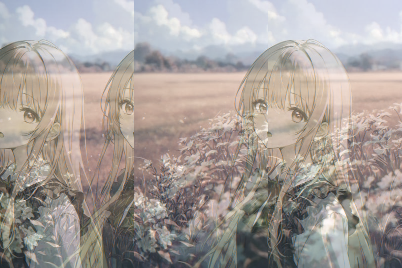

In [ ]:
# Test Pooling2D

im = np.array(Image.open("a.jpg"))
im = img_reshape(im)
pooled_im = Pooling2D((2,2), (2, 2), "average").forward(im)
reshaped_im = np.reshape(pooled_im, (pooled_im.shape[1], pooled_im.shape[2], pooled_im.shape[0]))
rounded_im = np.rint(reshaped_im)
print(im)
print("===============")
print(rounded_im)
Image.fromarray(rounded_im.astype(np.uint8))

In [ ]:
import os
import random

X_train = []
X_test = []
y_train = []
y_test = []

for filename in os.listdir("PandasBears/Train/Bears"):
    img = np.array(Image.open(os.path.join("PandasBears/Train/Bears",filename)))
    if img is not None:
        X_train.append(img)
        y_train.append("Bear")

for filename in os.listdir("PandasBears/Train/Pandas"):
    img = np.array(Image.open(os.path.join("PandasBears/Train/Pandas",filename)))
    if img is not None:
        X_train.append(img)
        y_train.append("Panda")

for filename in os.listdir("PandasBears/Test/Bears"):
    img = np.array(Image.open(os.path.join("PandasBears/Test/Bears",filename)))
    if img is not None:
        X_test.append(img)
        y_test.append("Bear")

for filename in os.listdir("PandasBears/Test/Pandas"):
    img = np.array(Image.open(os.path.join("PandasBears/Test/Pandas",filename)))
    if img is not None:
        X_test.append(img)
        y_test.append("Panda")

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
image_data = np.concatenate((X_train, X_test), axis=0)
image_label = np.concatenate((y_train, y_test), axis=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)
print(image_data.shape)
print(image_label.shape)

zipped = list(zip(X_test, y_test))
random.shuffle(zipped)
data_test, label_test = zip(*zipped)
data_test = np.array(data_test)
label_test = np.array(label_test)

(500, 256, 256, 3)
(500,)
(99, 256, 256, 3)
(500,)
(599, 256, 256, 3)
(599,)


/tmp/ipykernel_1241/2955951478.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
Acc: 0.52


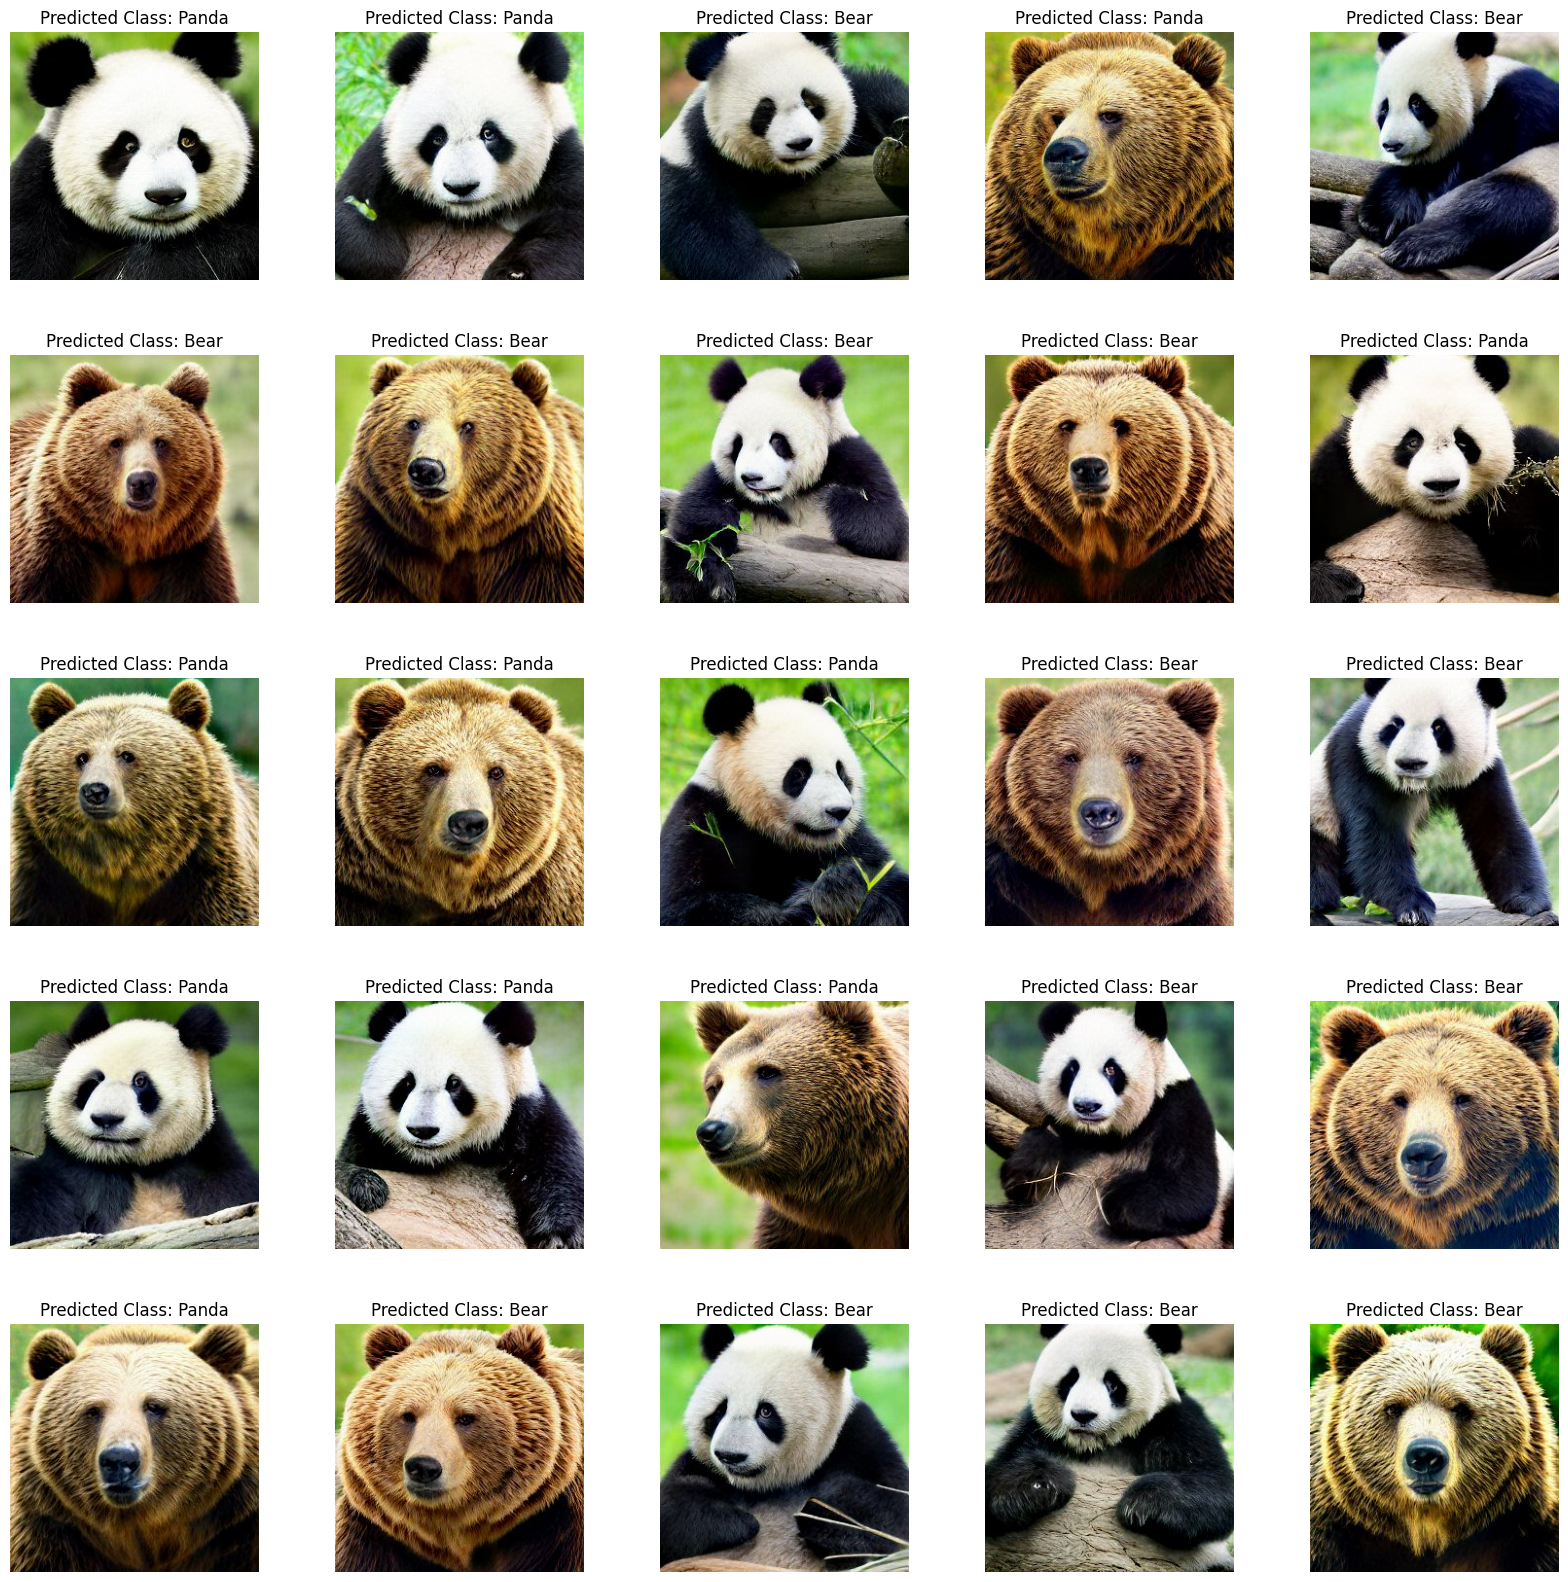

In [ ]:
model = Sequential([
        Conv2D(n_filters=2, filter_size=5, strides=(3,3), input_shape=img_reshape(X_train[0]).shape, padding=0),
        Pooling2D(pool_size=(2, 2), strides=(3,3), pool_type='average'),
        Flatten(),
        Dense(input_size=784, units=2, activation='relu'),
        Dense(input_size=2, units=1, activation='sigmoid')
    ])

acc = 0
total = 25
label = ["Bear", "Panda"]

plt.figure(figsize = (20,20))
for i in range(25):
    pred = model.predict(data_test[i])
    if (label[np.argmax(pred)] == label_test[i]):
        acc += 1
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(data_test[i])
    plt.title(f"Predicted Class: {label[np.argmax(pred)]}")
    plt.axis('off')

print(f"Acc: {acc/total}")

In [ ]:
import numpy as np

class Conv2D:
    def __init__(self, input_shape, padding, n_filters, filter_size, strides):
        self.input_shape = input_shape
        self.padding = padding
        self.n_filters = n_filters
        self.filter_size = filter_size
        self.strides = strides
        self.weights = np.random.randn(n_filters, filter_size, filter_size, input_shape[-1])
        self.bias = np.zeros((n_filters,))
        self.input = None
        self.output = None
        self.gradient_weights = None
        self.gradient_bias = None

    def forward(self, input_data):
        self.input = input_data
        input_height, input_width, input_channels = input_data.shape
        output_height = (input_height - self.filter_size + 2 * self.padding) // self.strides[0] + 1
        output_width = (input_width - self.filter_size + 2 * self.padding) // self.strides[1] + 1

        if self.padding > 0:
            padded_input = np.pad(input_data, ((self.padding, self.padding), (self.padding, self.padding), (0, 0)), mode='constant')
        else:
            padded_input = input_data

        self.output = np.zeros((output_height, output_width, self.n_filters))

        for i in range(output_height):
            for j in range(output_width):
                input_slice = padded_input[i * self.strides[0]:i * self.strides[0] + self.filter_size,
                                          j * self.strides[1]:j * self.strides[1] + self.filter_size, :]
                for k in range(self.n_filters):
                    self.output[i, j, k] = np.sum(input_slice * self.weights[k, :, :, :]) + self.bias[k]

        return self.output

    def backward(self, gradient):
        n_filters, output_height, output_width = gradient.shape

        gradient_input = np.zeros_like(self.input)
        self.gradient_weights = np.zeros_like(self.weights)
        self.gradient_bias = np.sum(gradient, axis=(1, 2))

        if self.padding > 0:
            padded_input = np.pad(self.input, ((0, 0), (self.padding, self.padding), (self.padding, self.padding)), mode='constant')
        else:
            padded_input = self.input

        for i in range(output_height):
            for j in range(output_width):
                input_slice = padded_input[:, i * self.strides[0]:i * self.strides[0] + self.filter_size,
                                        j * self.strides[1]:j * self.strides[1] + self.filter_size]
                for k in range(n_filters):
                    gradient_input[:, i * self.strides[0]:i * self.strides[0] + self.filter_size,
                                    j * self.strides[1]:j * self.strides[1] + self.filter_size] += np.sum(self.weights[k] * gradient[k, i, j])
                    self.gradient_weights[k] += np.sum(input_slice * gradient[k, i, j])

        return gradient_input

# Example usage during training
if __name__ == "__main__":
    # Create a Conv2D layer
    conv_layer = Conv2D(input_shape=(28, 28, 3), padding=0, n_filters=32, filter_size=3, strides=(1, 1))

    # Create random input data
    input_data = np.random.randn(28, 28, 3)

    # Forward pass
    output = conv_layer.forward(input_data)
    print("Output shape:", output.shape)

    # Backward pass (gradient computation)
    gradient = np.random.randn(26, 26, 32)
    gradient_input = conv_layer.backward(gradient)
    print(gradient_input)
    print("Gradient input shape:", gradient_input.shape)

    # Update weights using a learning rate
    learning_rate = 0.01


Output shape: (26, 26, 32)
[[[ -4.33876458  -4.66305973  -5.4793694 ]
  [-21.47312736  20.46025548  42.43089347]
  [-22.5875798   78.95224816 102.74943635]
  ...
  [-27.53632382 -41.73952151 -23.45727533]
  [ -9.59846956   3.13032051 -37.74844628]
  [-43.95666351 -42.64721706 -85.41244813]]

 [[ -4.33876458  -4.66305973  -5.4793694 ]
  [-21.47312736  20.46025548  42.43089347]
  [-22.5875798   78.95224816 102.74943635]
  ...
  [-27.53632382 -41.73952151 -23.45727533]
  [ -9.59846956   3.13032051 -37.74844628]
  [-43.95666351 -42.64721706 -85.41244813]]

 [[ -4.33876458  -4.66305973  -5.4793694 ]
  [-21.47312736  20.46025548  42.43089347]
  [-22.5875798   78.95224816 102.74943635]
  ...
  [-27.53632382 -41.73952151 -23.45727533]
  [ -9.59846956   3.13032051 -37.74844628]
  [-43.95666351 -42.64721706 -85.41244813]]

 ...

 [[ -4.33876458  -4.66305973  -5.4793694 ]
  [-21.47312736  20.46025548  42.43089347]
  [-22.5875798   78.95224816 102.74943635]
  ...
  [-27.53632382 -41.73952151 -23.4

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61bb34cb-2316-475c-9595-96cf5c0e1564' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>